In [1]:
using Plots
     

# Defining parameters
    m  = 1 
    ω  = 1
    ωs = 2
    g  = 1.5
    g1 = g
    g2 = g
    λ  = 2
     

# Defining Hamiltonian

function Hamiltonian(x,p)
    # Defining oscilator Hamiltonian
    I  = [1 0;0 1]
    ho = ( p^2/(2*m) + (1/2)*m*ω^2*x^2 ) * ( kron(I,I) )

    # Defining spin Hamiltonian
    σz = [1 0; 0 -1]
    hs = (ωs/2) * ( kron(σz,I) + kron(I,σz) )

    # Defining oscillator and spin interaction
    σ_plus  = [0 1;0 0]
    σ_minus = [0 0;1 0]
    a       = x*sqrt(m*ω/2) + im*p/sqrt(m*ω*2)
    a_star  = x*sqrt(m*ω/2) - im*p/sqrt(m*ω*2)
    hos     = (g1/2) * ( kron(a*σ_plus + a_star*σ_minus,I) ) + ( kron(I, (g2/2)*(a*σ_plus + a_star*σ_minus) ))

    # Defiing spin-spin interaction
    hss = (λ/2) * (kron(σ_plus,σ_minus) + kron(σ_minus,σ_plus))

return ho+hs+hos+hss
end

Hamiltonian (generic function with 1 method)

In [4]:
function Heff(x,p,Ψ)
    return real(Ψ'*Hamiltonian(x,p)*Ψ)
end   

function Hamiltonian2(x,p)
    # Defining parameters
    
    I  = [1 0;0 1]
    
    # Defining spin Hamiltonian
    σz = [1 0; 0 -1]
    hs = (ωs/2) * ( kron(σz,I) + kron(I,σz) )

    # Defining oscillator and spin interaction
    σ_plus  = [0 1;0 0]
    σ_minus = [0 0;1 0]
    a       = x*sqrt(m*ω/2) + im*p/sqrt(m*ω*2)
    a_star  = x*sqrt(m*ω/2) - im*p/sqrt(m*ω*2)
    hos     = (g1/2) * ( kron(a*σ_plus + a_star*σ_minus,I) ) + ( kron(I, (g2/2)*(a*σ_plus + a_star*σ_minus) ))

    # Defiing spin-spin interaction
    hss = (λ/2) * (kron(σ_plus,σ_minus) + kron(σ_minus,σ_plus))

return hs+hos+hss
end

Hamiltonian2 (generic function with 1 method)

In [5]:
function Entropy(Ψ)
    ρ = Ψ*Ψ'
    a = ρ[1,1]+ρ[2,2]
    b = ρ[3,3]+ρ[4,4]
    return -real(( a*log(complex(a)) + b*log(complex(b)) ))
end

Entropy (generic function with 1 method)

In [6]:
function run()
    
    dt = 0.0001
    N  = 500000
    Nd = Int(0.001/dt)

    dp = 0.0001
    dx = 0.0001

    # Initial position and state vector
    x0  = 0.1
    p0  = 0
    Ψ0  = [1;0;0;0]

    global xdata = zeros(Int(N/Nd))
    global pdata = zeros(Int(N/Nd))
    global Ess   = zeros(Int(N/Nd))
    global Eo    = zeros(Int(N/Nd))
    global Sent  = zeros(Int(N/Nd))
    global time  = zeros(Int(N/Nd))

    xdata[1] = x0 
    pdata[1] = p0
    Ess[1]   = real(Ψ0'*Hamiltonian2(x0,p0)*Ψ0)
    Eo[1]    = p0^2/(2*m) + (1/2)*m*ω^2*x0^2  
    Sent[1]  = Entropy(Ψ0)
    time[1]  = 0

    j        = 2
    for i=2:N-1
        Ψ     = ([1 0 0 0;0 1 0 0; 0 0 1 0; 0 0 0 1] - im.*Hamiltonian2(x0,p0)*dt) * Ψ0

        x     = x0 + ( ( Heff(x0,p0+dp,Ψ0) - Heff(x0,p0,Ψ0) )/(dp) ) * dt
        p     = p0 - ( ( Heff(x0+dx,p0,Ψ0) - Heff(x0,p0,Ψ0) )/(dx) ) * dt

        if mod(i,Nd) ==0
            xdata[j] = x 
            pdata[j] = p 
            Ess[j]   = real(Ψ'*Hamiltonian2(x,p)*Ψ)
            Eo[j]    = p^2/(2*m) + (1/2)*m*ω^2*x^2 
            Sent[j]  = Entropy(Ψ)
            time[j]  = i*dt
            j        = j+1
        end

        x0=x
        p0=p
        Ψ0=Ψ

    end 
    
end

@time run()

     

  7.151208 seconds (158.04 M allocations: 14.351 GiB, 13.51% gc time, 7.32% compilation time)


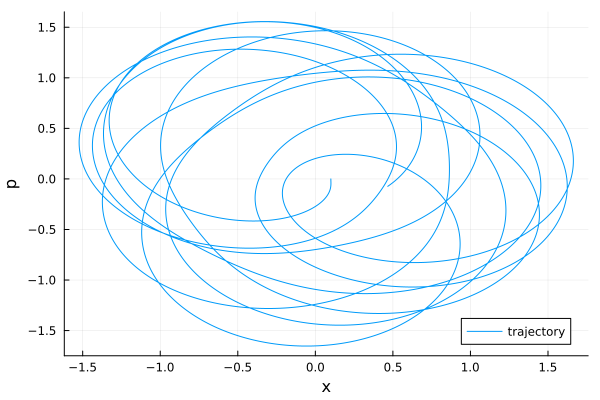

In [7]:
plot(xdata,pdata,label="trajectory")
xlabel!("x")
ylabel!("p")

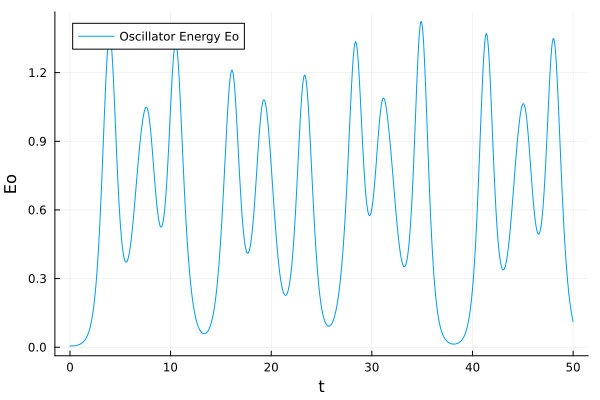

In [8]:

plot(time,Eo,label="Oscillator Energy Eo")
xlabel!("t")
ylabel!("Eo")
     

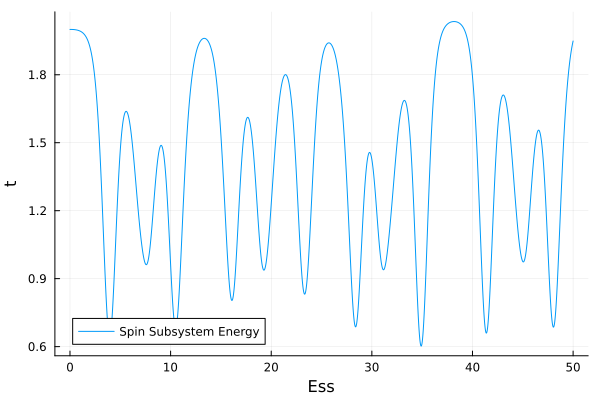

In [9]:

plot(time,Ess,label="Spin Subsystem Energy")
xlabel!("Ess")
ylabel!("t")
     

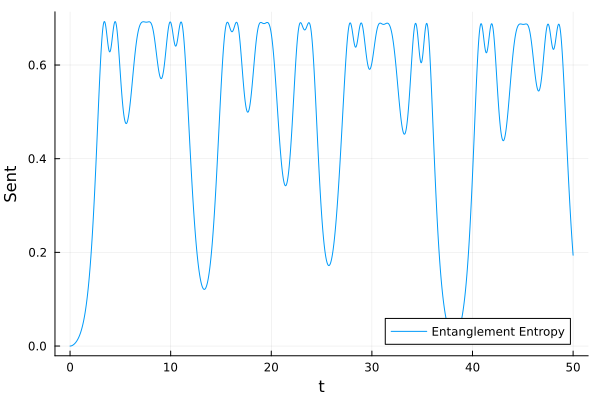

In [10]:

plot(time,Sent,label="Entanglement Entropy")
xlabel!("t")
ylabel!("Sent")